# Ensemble Technique : Simple and Nested stacking classifier





# How the Notebook is organized ?

Section 1 : Generalized part

a. Importing necessary libraries

b. Loading the required dataset

c. Baseline understanding of the data

d. EDA of the dataset

e. Model specific preprocessing

Section 2 : Simple Stacking Classifier  with 4 optimized base models ( random forest , gradient boost , light GBM , extreme gradient boost ) and logistic regression as a meta model

Section 3 : Nested Stacking Classifier with 4 optimized base models ( random forest , gradient boost , light GBM , extreme gradient boost ) , logistic regression as a level 2 meta model and Support vector machine as level 3 meta model





# Section 1 : Generatized part

In [69]:
#Importing the libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.ensemble import GradientBoostingClassifier , RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split , GridSearchCV


# Import and suppress warnings
import warnings
warnings.filterwarnings('ignore')

## a. Load the dataset

In [3]:
attrition = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [4]:
attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
attrition.shape

(1470, 35)

In [6]:
attrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
attrition.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
attrition.describe(include='object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


# b . Exploratory Data Analysis

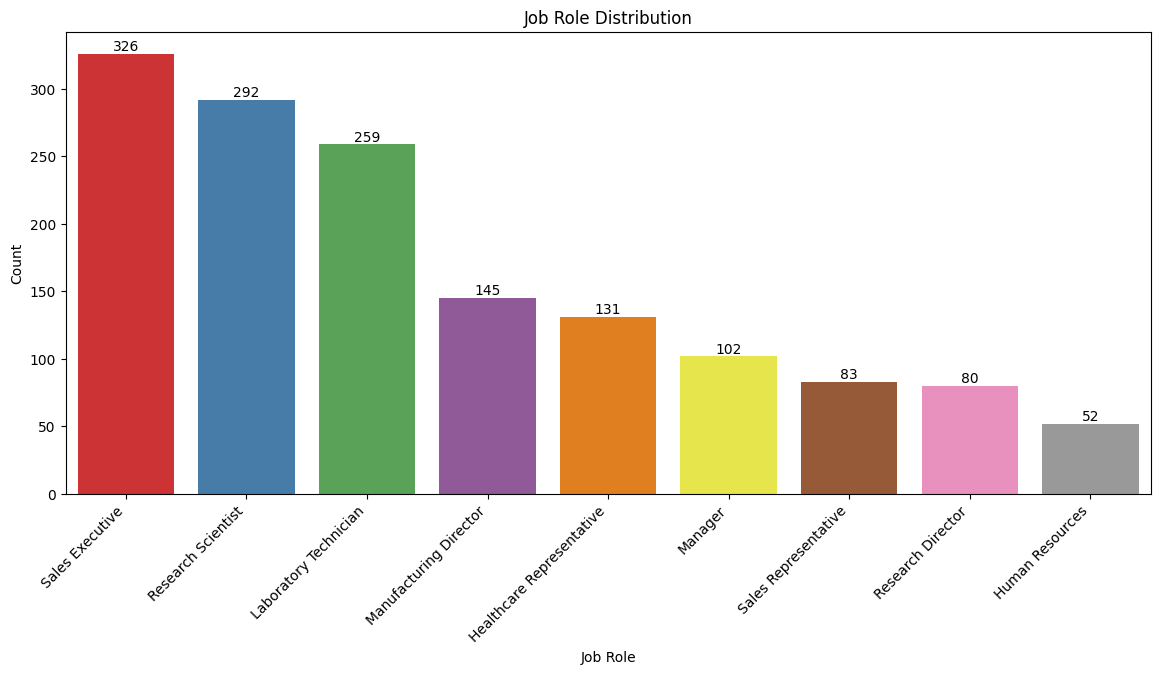

In [9]:
plt.figure(figsize=(14, 6))
sns.barplot(attrition.JobRole.value_counts() , palette = 'Set1');

# Show bar values on top of the bars
for bar in plt.gca().patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1, int(height), ha='center', va='bottom')  # Adjust vertical offset (0.1) as needed

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.title('Job Role Distribution')
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.show()

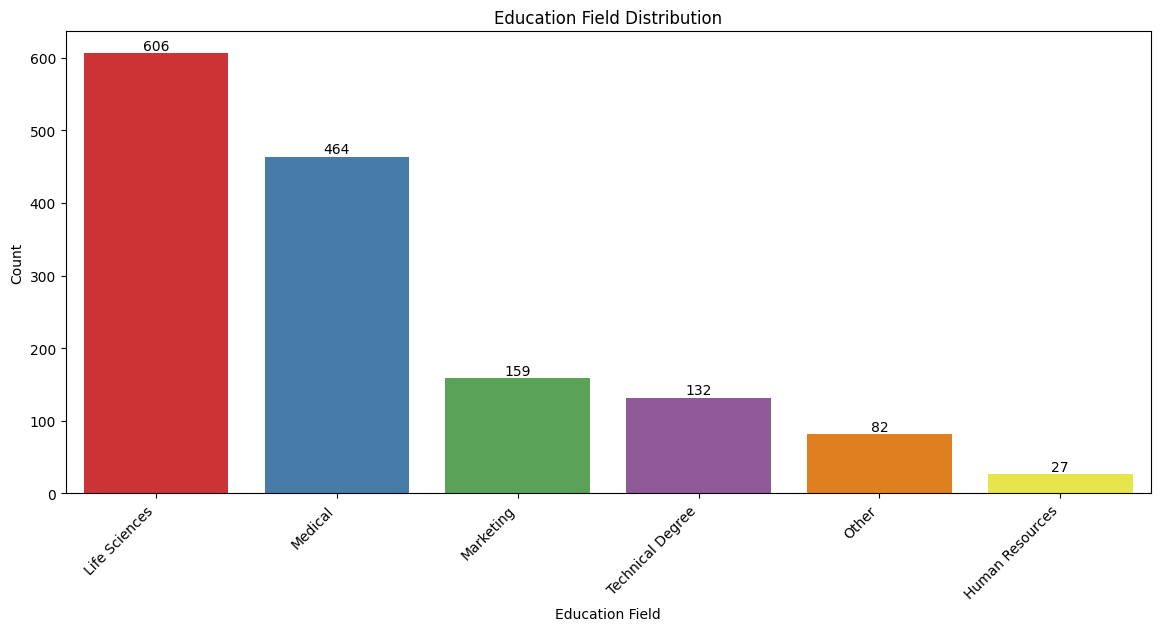

In [10]:
plt.figure(figsize=(14, 6))
sns.barplot(attrition.EducationField.value_counts() , palette = 'Set1');

# Show bar values on top of the bars
for bar in plt.gca().patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1, int(height), ha='center', va='bottom')  # Adjust vertical offset (0.1) as needed

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.title('Education Field Distribution')
plt.xlabel('Education Field')
plt.ylabel('Count')
plt.show()

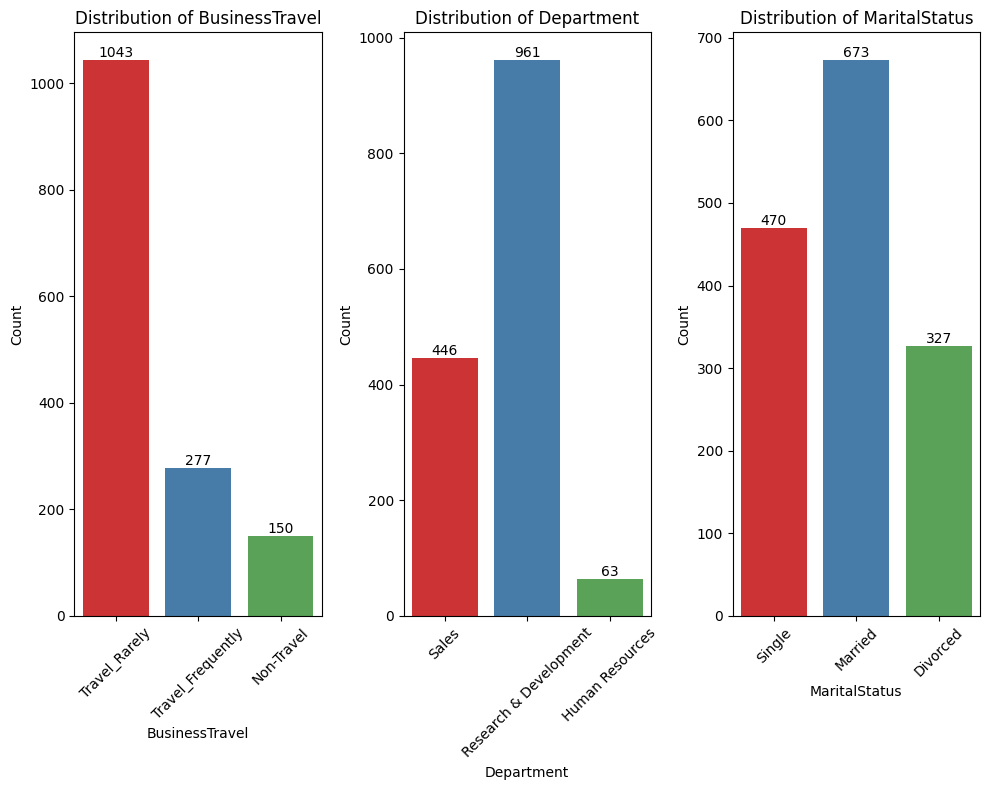

In [11]:

categorical_columns = ['BusinessTravel', 'Department', 'MaritalStatus']

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(categorical_columns), figsize=(10, 8))

# Iterate over categorical columns and create bar plots
for i, column in enumerate(categorical_columns):
    sns.countplot(x=column, data=attrition, ax=axes[i], palette='Set1')
    for bar in axes[i].patches:  # Access bars within each subplot's axis
        height = bar.get_height()
        axes[i].text(bar.get_x() + bar.get_width() / 2, height + 0.1, int(height), ha='center', va='bottom')
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [12]:
attrition.describe(include='O')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


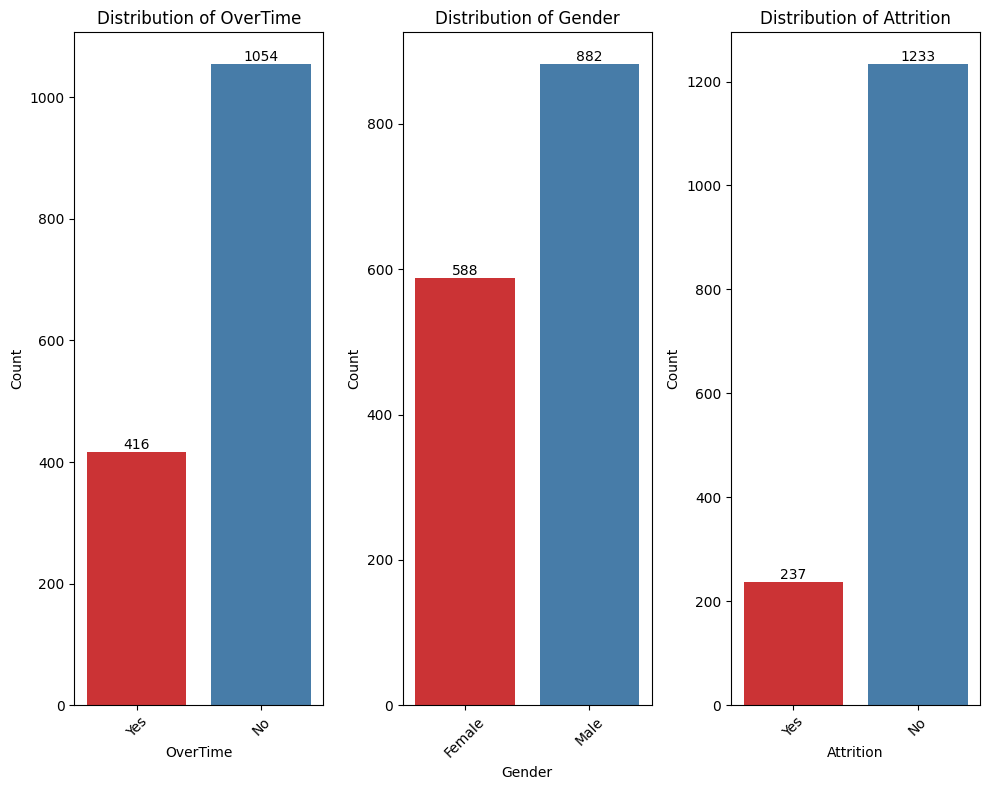

In [13]:

categorical_columns = ['OverTime', 'Gender', 'Attrition']

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(categorical_columns), figsize=(10, 8))

# Iterate over categorical columns and create bar plots
for i, column in enumerate(categorical_columns):
    sns.countplot(x=column, data=attrition, ax=axes[i], palette='Set1')
    for bar in axes[i].patches:  # Access bars within each subplot's axis
        height = bar.get_height()
        axes[i].text(bar.get_x() + bar.get_width() / 2, height + 0.1, int(height), ha='center', va='bottom')
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [14]:
attrition_num = pd.DataFrame(data = attrition.select_dtypes(exclude='O'))
attrition_num.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

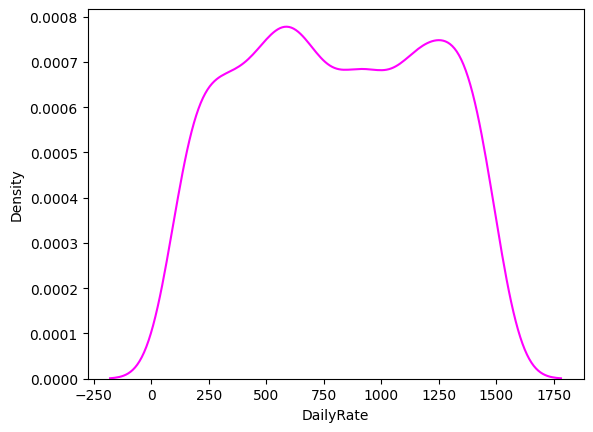

In [15]:
sns.kdeplot(attrition.DailyRate , color = 'magenta' );

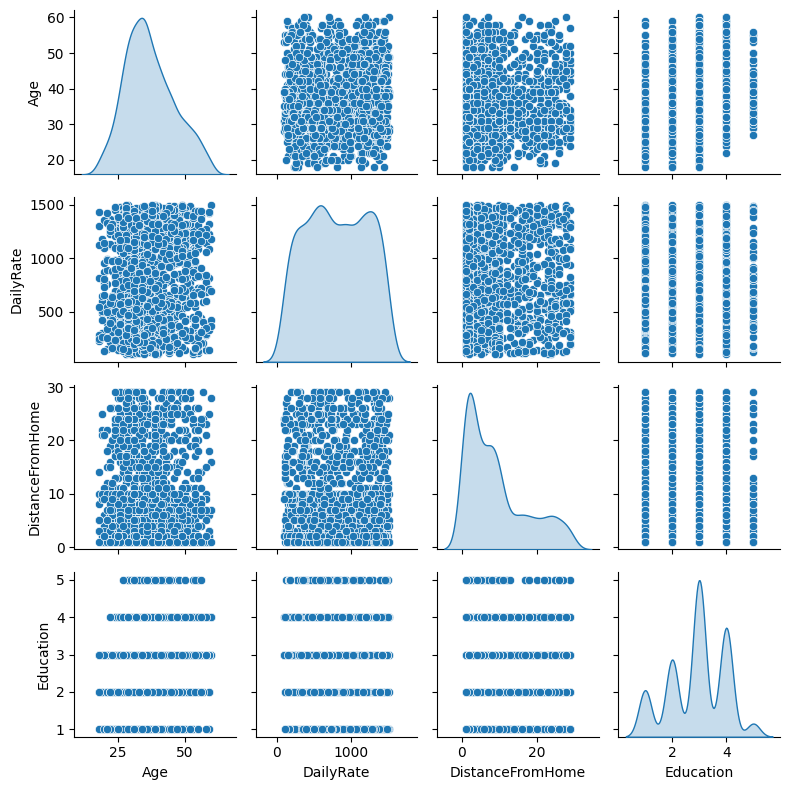

In [16]:
# Assuming 'attrition' is your DataFrame
columns_to_plot = ['Age', 'DailyRate', 'DistanceFromHome', 'Education']

# Create the pairplot with reduced size and color palette
sns.pairplot(attrition[columns_to_plot], diag_kind='kde', palette='coolwarm', height=2)  # Adjust size as needed
plt.tight_layout()
plt.show()

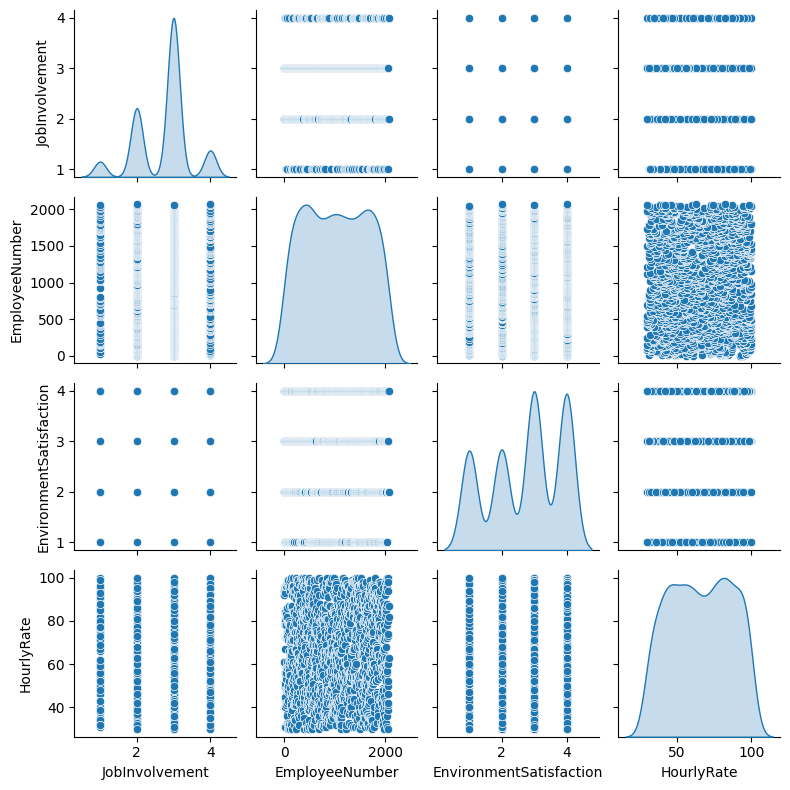

In [17]:
# Assuming 'attrition' is your DataFrame
columns_to_plot = ['JobInvolvement','EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate']

# Create the pairplot with reduced size and color palette
sns.pairplot(attrition[columns_to_plot], diag_kind='kde', palette='coolwarm', height=2)  # Adjust size as needed
plt.tight_layout()
plt.show()

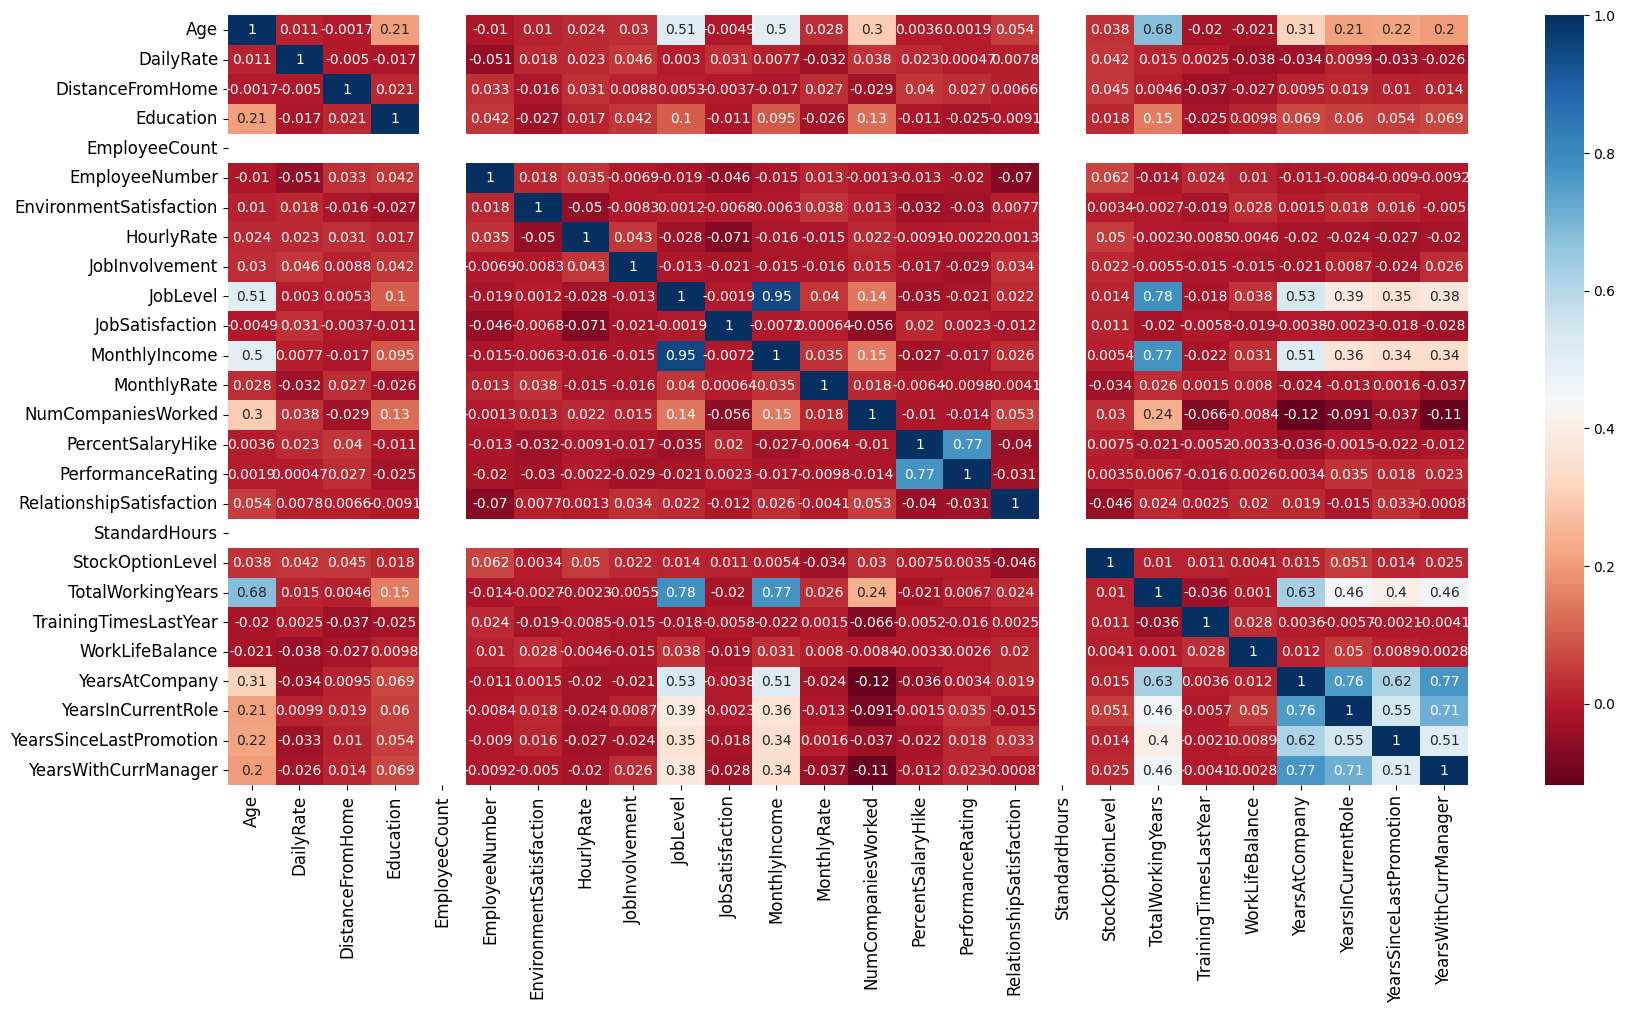

In [18]:
# Calculate the correlation matrix for numerical columns
correlation_matrix = attrition_num.corr()

# Create a larger figure
plt.figure(figsize=(20, 10))

# Create the heatmap with annotations and colormap
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu')

# Adjust font size for better readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

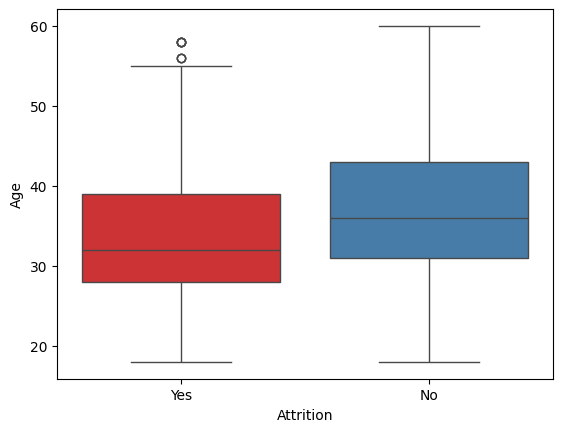

In [19]:
sns.boxplot(x='Attrition' , y='Age' , data=attrition , palette = 'Set1');

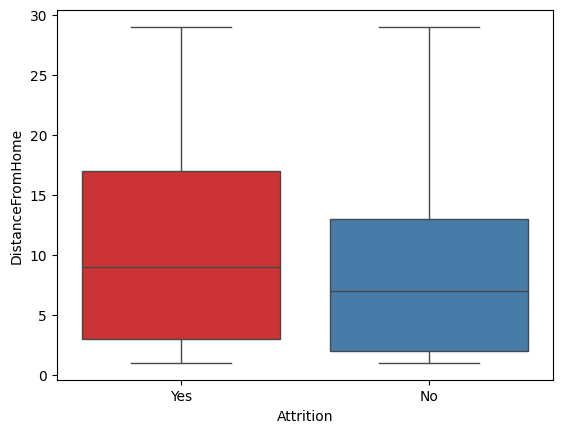

In [20]:
sns.boxplot(x='Attrition' , y='DistanceFromHome' , data=attrition , palette = 'Set1');

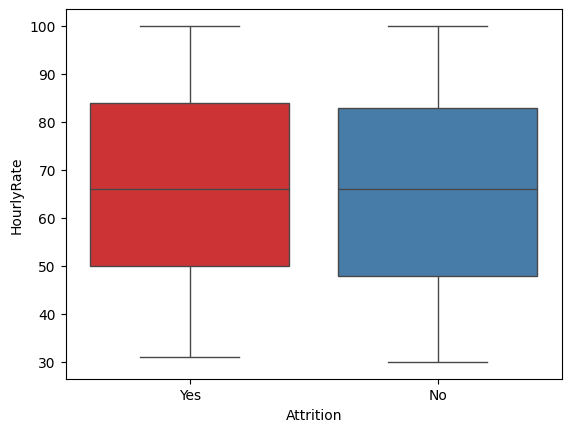

In [21]:
sns.boxplot(x='Attrition' , y='HourlyRate' , data=attrition , palette = 'Set1');

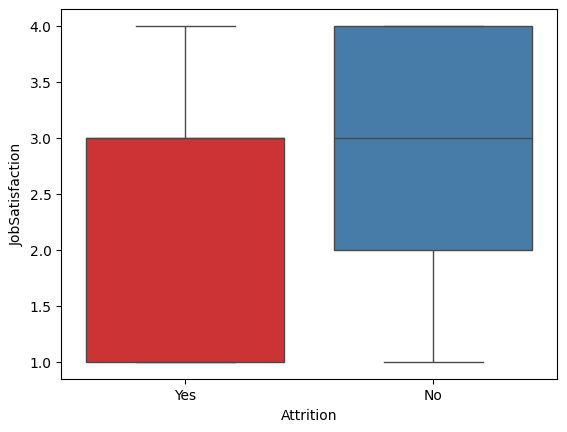

In [22]:
sns.boxplot(x='Attrition' , y='JobSatisfaction' , data=attrition , palette = 'Set1');

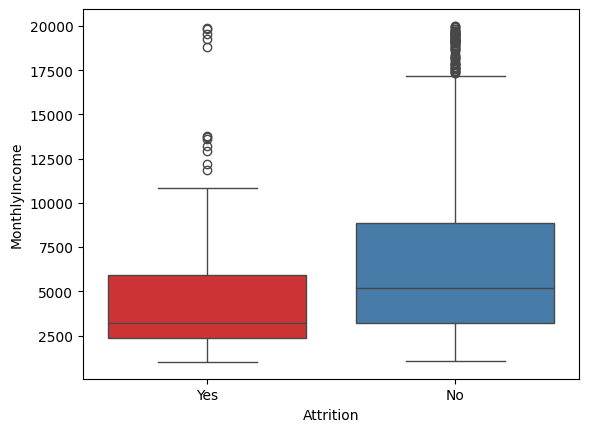

In [23]:
sns.boxplot(x='Attrition' , y='MonthlyIncome' , data=attrition , palette = 'Set1');

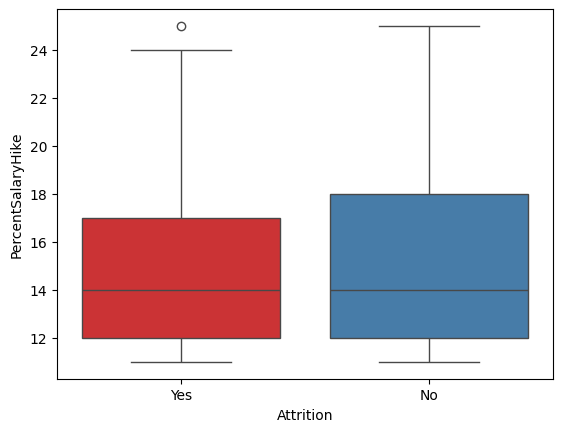

In [24]:
sns.boxplot(x='Attrition' , y='PercentSalaryHike' , data=attrition , palette = 'Set1');

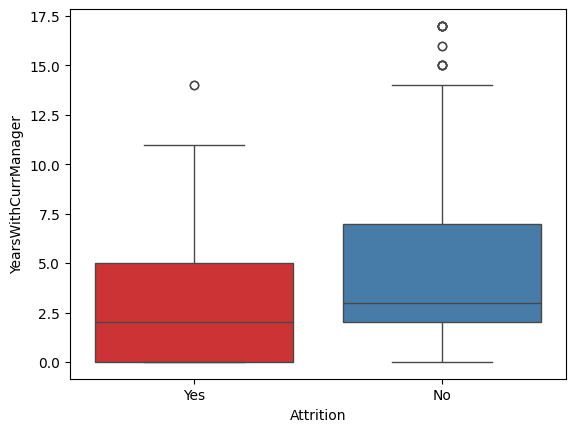

In [25]:
sns.boxplot(x='Attrition' , y='YearsWithCurrManager' , data=attrition , palette = 'Set1');

# c. Model specific preprocessing

missing value analysis for Imputation

In [26]:
attrition.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


Feature engineering and categorical encoding

In [27]:
#Extracting the Numeric and Categorical features

attrition_num = pd.DataFrame(data = attrition.select_dtypes(include = ['int64']))
attrition_cat = pd.DataFrame(data = attrition.select_dtypes(include = ['object']))
print("Shape of Numeric: ",attrition_num.shape)
print("Shape of Categorical: ",attrition_cat.shape)

Shape of Numeric:  (1470, 26)
Shape of Categorical:  (1470, 9)


In [28]:
attrition_num.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [29]:
attrition_cat.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [30]:
# drop the dependent column from the categorical frame

attrition_cat = attrition_cat.drop(['Attrition'], axis=1) # Dropping the target column

In [31]:
attrition_cat.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


Encoding Categorical Fields

The categorical fields have been encoded using the get_dummies() function of Pandas.

In [32]:
#Encoding using Pandas' get_dummies
attrition_cat_encoded = pd.get_dummies(attrition_cat , dtype=int)
attrition_cat_encoded.head(5)

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0,0,1,0,0,1,0,1,0,0,...,0,0,1,0,0,0,1,1,0,1
1,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,1,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
3,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,1
4,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,1,1,0


In [33]:
print("Shape of Numeric columns after scaling :" , attrition_num.shape)
print("Shape of Categorical columns after scaling :" , attrition_cat_encoded.shape)

Shape of Numeric columns after scaling : (1470, 26)
Shape of Categorical columns after scaling : (1470, 29)


In [34]:
#Combining the Categorical and Numeric features

attrition_final_df = pd.concat([attrition_num,attrition_cat_encoded], axis = 1)
print("Shape of final dataframe: ",attrition_final_df.shape)

Shape of final dataframe:  (1470, 55)


In [35]:
attrition_final_df.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0,0,1,0,0,0,1,1,0,1
1,49,279,8,1,1,2,3,61,2,2,...,0,1,0,0,0,1,0,1,1,0
2,37,1373,2,2,1,4,4,92,2,1,...,0,0,0,0,0,0,1,1,0,1
3,33,1392,3,4,1,5,4,56,3,1,...,0,1,0,0,0,1,0,1,0,1
4,27,591,2,1,1,7,1,40,3,1,...,0,0,0,0,0,1,0,1,1,0


In [36]:
#Extracting the target variable - 'Attrition'
target = attrition['Attrition']

#Mapping 'Yes' to 1 and 'No' to 0
map = {'Yes':1, 'No':0}
target = target.apply(lambda x: map[x])

print("Shape of target: ",target.shape)

X = attrition_final_df #Features
y = target #Target

Shape of target:  (1470,)


Train and Test Split

The data is next split into training and test dataset using the train_test_split functionality of sklearn.

In [37]:
# Split data into train and test sets as well as for validation and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.75,random_state=0);
print("Shape of X Train: ",X_train.shape)
print("Shape of X Test: ",X_test.shape)
print("Shape of y Train: ",y_train.shape)
print("Shape of y Test: ",y_test.shape)

Shape of X Train:  (1102, 55)
Shape of X Test:  (368, 55)
Shape of y Train:  (1102,)
Shape of y Test:  (368,)


# Section 2 : Simple Stacking Classifier with 4 optimized base models ( random forest , gradient boost , light GBM , extreme gradient boost ) and logistic regression as a meta model

Simple Stacking, also known as Stacked Generalization, is an ensemble learning technique that combines multiple base models to create a more powerful meta-model. Here's a simplified example to illustrate the concept:

1. Base Models:

Let's consider three base models:

Model 1: Logistic Regression
Model 2: Random Forest Classifier
Model 3: Support Vector Machine (SVM)
Each model is trained on the same training data.

2. Generating Predictions:

Each model makes predictions on a validation set. These predictions become features for the meta-model.

3. Meta-Model:

A meta-model, often a simple model like Logistic Regression, is trained on this new dataset. The meta-model learns to combine the predictions of the base models to make the final prediction.

a. Define , fit and predict using the base models ( Random forest , GBM , light GBM , XGBM )

Code explanation

Base Model Training:

We define four base models:Random Forest, Gradient Boosting, LightGBM, and XGBoost.

Each model is tuned using GridSearchCV to find the best hyperparameters.

Meta-Features:

The predictions of each base model on the test set are used as features for the meta-model.

Meta-Model Training:

A Logistic Regression model is trained on the meta-features and the true labels from the test set.

Final Predictions:
The meta-model makes the final predictions based on the predictions of the base models.

Evaluation:
The performance of the final predictions is evaluated using classification metrics like accuracy, precision, recall, and F1-score.

In [38]:
# Define base models and their hyperparameter grids

base_models = [
    ('rf', GridSearchCV(RandomForestClassifier(), param_grid={'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10], 'min_samples_split': [2, 5, 10]}, cv=5)),
    ('gb', GridSearchCV(GradientBoostingClassifier(), param_grid={'n_estimators': [100, 200, 300], 'learning_rate': [0.1, 0.05, 0.01], 'max_depth': [3, 5, 7]}, cv=5)),
    ('lgbm', GridSearchCV(LGBMClassifier(), param_grid={'num_leaves': [31, 63, 127], 'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [100, 200, 300]}, cv=5)),
    ('xgb', GridSearchCV(XGBClassifier(), param_grid={'max_depth': [3, 5, 7], 'learning_rate': [0.1, 0.05, 0.01], 'n_estimators': [100, 200, 300]}, cv=5))
]

In [39]:
# Fit base models

for name, model in base_models:
    model.fit(X_train, y_train)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [40]:
# Get predictions from base models

meta_features = np.column_stack([model.predict_proba(X_test)[:, 1] for name, model in base_models])

In [42]:
meta_features.shape

(368, 4)

In [43]:
pd.DataFrame(meta_features).head()

,0,1,2,3
0,0.086953,0.060749,2.540681e-04,0.091793
1,0.071176,0.020392,7.662119e-07,0.039518
2,0.152098,0.103144,1.343383e-02,0.138563
3,0.153648,0.050104,1.042314e-03,0.105580
4,0.716731,0.904407,9.992992e-01,0.920938


In [44]:
# Train a meta-model (Logistic Regression)

meta_model = LogisticRegression()
meta_model.fit(meta_features, y_test)

LogisticRegression()

In [45]:
# Make final predictions using the meta-model

final_predictions = meta_model.predict(meta_features)

In [51]:
pd.DataFrame(final_predictions).head()

,0
0,0
1,0
2,0
3,0
4,1


In [46]:
# Evaluate the final predictions

print(classification_report(y_test, final_predictions))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       310
           1       0.70      0.33      0.45        58

    accuracy                           0.87       368
   macro avg       0.79      0.65      0.69       368
weighted avg       0.86      0.87      0.85       368



# Section 3 : Nested Stacking Classifier

Level 1 Models: Train multiple base models ( Random forest , GBM , light GBM , XGBM ) on the original dataset.

Level 2 Meta-Model: Train a meta-model ( Logistic regression ) on the predictions of the Level 1 models.

Level 3 Meta-Model : Train another meta-model ( support vector machine ) on the predictions of the Level 2 meta-model and the original base models. This can be repeated for multiple levels.

In [52]:
# Define level 1 models and their hyperparameter grids

level1_models = [
    ('rf', GridSearchCV(RandomForestClassifier(), param_grid={'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10], 'min_samples_split': [2, 5, 10]}, cv=5)),
    ('gb', GridSearchCV(GradientBoostingClassifier(), param_grid={'n_estimators': [100, 200, 300], 'learning_rate': [0.1, 0.05, 0.01], 'max_depth': [3, 5, 7]}, cv=5)),
    ('lgbm', GridSearchCV(LGBMClassifier(), param_grid={'num_leaves': [31, 63, 127], 'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [100, 200, 300]}, cv=5)),
    ('xgb', GridSearchCV(XGBClassifier(), param_grid={'max_depth': [3, 5, 7], 'learning_rate': [0.1, 0.05, 0.01], 'n_estimators': [100, 200, 300]}, cv=5))
]

In [53]:
# Fit level 1 models

level1_predictions = []
for name, model in level1_models:
    model.fit(X_train, y_train)
    level1_predictions.append(model.predict_proba(X_test)[:, 1])

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [58]:
pd.DataFrame(level1_predictions).T

,0,1,2,3
0,0.11,0.049644,2.540681e-04,0.091793
1,0.05,0.015317,7.662119e-07,0.039518
2,0.16,0.115670,1.343383e-02,0.138563
3,0.11,0.035757,1.042314e-03,0.105580
4,0.71,0.940925,9.992992e-01,0.920938
...,...,...,...,...
363,0.10,0.066304,2.329554e-04,0.049076
364,0.09,0.037340,1.384030e-04,0.076630
365,0.18,0.058260,3.946127e-04,0.106613
366,0.04,0.032889,3.262548e-06,0.041274


In [59]:
# Combine level 1 model predictions (meta-features for level 2)

level2_features = np.column_stack(level1_predictions)

In [61]:
pd.DataFrame(level2_features).head()

,0,1,2,3
0,0.11,0.049644,2.540681e-04,0.091793
1,0.05,0.015317,7.662119e-07,0.039518
2,0.16,0.115670,1.343383e-02,0.138563
3,0.11,0.035757,1.042314e-03,0.105580
4,0.71,0.940925,9.992992e-01,0.920938


In [62]:
# Define level 2 meta-model (Logistic Regression)

level2_model = LogisticRegression()
level2_model.fit(level2_features, y_test)

LogisticRegression()

In [63]:
# Level 2 predictions on level 1 predictions (for level 3)

level3_features = level2_model.predict_proba(level2_features)[:, 1]

In [67]:
pd.DataFrame(level3_features)

,0
0,0.089692
1,0.074335
2,0.112211
3,0.089482
4,0.909716
...,...
363,0.086236
364,0.084395
365,0.101096
366,0.075344


In [70]:
# Define level 3 meta-model (Support Vector Machine)

level3_model = SVC()  # Set parameters here if needed
level3_model.fit(level3_features.reshape(-1, 1), y_test)  # Reshape for SVM

SVC()

In [71]:
# Final predictions using level 3 meta-model

final_predictions = level3_model.predict(level3_features.reshape(-1, 1))

In [74]:
pd.DataFrame(final_predictions).value_counts()

,count
0,
0,347
1,21


In [75]:
# Evaluate the final predictions

print(classification_report(y_test, final_predictions))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       310
           1       0.86      0.31      0.46        58

    accuracy                           0.88       368
   macro avg       0.87      0.65      0.70       368
weighted avg       0.88      0.88      0.86       368

